In [18]:
import csv
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('機器學習期末kkbox.csv', index_col=0)
df_test = pd.read_csv('機器學習期末kkbox_test.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
df.head()

,artist_name,bd,city,composer,expiration_date,expiration_date_month,expiration_date_new,expiration_date_year,genre_ids,index,...,source_system_tab_search,source_system_tab_settings,source_system_tab_nan,registered_via_13,registered_via_16,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_nan
0,3784,0,0,16653,2017-10-05,10,1507132800,2017,307,0,...,0,0,0,0,0,0,0,1,0,0
1,5190,0,0,9701,2017-10-05,10,1507132800,2017,2,1,...,0,0,0,0,0,0,0,1,0,0
2,9451,0,0,63665,2017-10-05,10,1507132800,2017,97,2,...,0,0,0,0,0,0,0,1,0,0
3,35336,0,0,67752,2017-10-05,10,1507132800,2017,2,3,...,0,0,0,0,0,0,0,1,0,0
4,25764,0,0,60377,2017-10-05,10,1507132800,2017,371,4,...,0,0,0,0,0,0,0,1,0,0


In [21]:
id_test = pd.read_csv('test_ids_df.csv', index_col=0)
id_test.head()

,id
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [22]:
df.shape

(7370601, 37)

In [23]:
df_test.shape

(2556790, 36)

# 評估方法def

In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#ROC & AUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(predicted, actual):
    
    # Table-Type Plotting
    #print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    print('Classification Report:\n{}'.format(classification_report(predicted, actual)))
    print('Accuracy: {}'.format(accuracy_score(predicted, actual)))
    print('Precision: {}'.format(precision_score(predicted, actual)))
    print('Recall: {}'.format(recall_score(predicted, actual)))
    print('F-1: {}'.format(f1_score(predicted, actual)))
    print('AUC: {}'.format(roc_auc_score(predicted, actual)))    
        
    # ROC Curve Plotting
    fpr, tpr, thresh = roc_curve(actual, predicted)
    roc_auc = roc_auc_score(predicted, actual)    
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    tp, fp, fn, tn  = confusion_matrix(actual, predicted).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print('\n')

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix

def printCM(y,y_pred):
    print('Confusion Matrix:\n{}'.format(confusion_matrix(y, y_pred)))
    tp, fp, fn, tn  = confusion_matrix(y, y_pred).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print('\n')

# 訓練/測試資料切割

In [26]:
df_x = df.drop(["target",'registration_init_time','expiration_date'], axis = 1)
df_y = df['target']
df_y = pd.DataFrame(df_y)

X = df_x.iloc[:,:].values
y = df_y.iloc[:,-1].values

In [27]:
len(df_x.columns)

34

In [28]:
df_x.columns

Index(['artist_name', 'bd', 'city', 'composer', 'expiration_date_month',
       'expiration_date_new', 'expiration_date_year', 'genre_ids', 'index',
       'language', 'lyricist', 'msno', 'registration_init_time_month',
       'registration_init_time_new', 'registration_init_time_year', 'song_id',
       'song_length', 'source_screen_name', 'source_system_tab_discover',
       'source_system_tab_explore', 'source_system_tab_listen with',
       'source_system_tab_my library', 'source_system_tab_notification',
       'source_system_tab_radio', 'source_system_tab_search',
       'source_system_tab_settings', 'source_system_tab_nan',
       'registered_via_13', 'registered_via_16', 'registered_via_3',
       'registered_via_4', 'registered_via_7', 'registered_via_9',
       'registered_via_nan'],
      dtype='object')

In [29]:
df_x_test = df_test.drop(['registration_init_time','expiration_date'], axis = 1)
X_ = df_x_test.iloc[:,:].values

In [30]:
df_x_test.columns

Index(['artist_name', 'bd', 'city', 'composer', 'expiration_date_month',
       'expiration_date_new', 'expiration_date_year', 'genre_ids', 'index',
       'language', 'lyricist', 'msno', 'registration_init_time_month',
       'registration_init_time_new', 'registration_init_time_year', 'song_id',
       'song_length', 'source_screen_name', 'source_system_tab_discover',
       'source_system_tab_explore', 'source_system_tab_listen with',
       'source_system_tab_my library', 'source_system_tab_notification',
       'source_system_tab_radio', 'source_system_tab_search',
       'source_system_tab_settings', 'source_system_tab_nan',
       'registered_via_13', 'registered_via_16', 'registered_via_3',
       'registered_via_4', 'registered_via_7', 'registered_via_9',
       'registered_via_nan'],
      dtype='object')

In [31]:
len(df_x_test.columns)

34

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)#,random_state=3)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


all_test_std = sc.transform(X_)

In [33]:
X.shape

(7370601, 34)

In [34]:
X_.shape

(2556790, 34)

In [35]:
print(np.any(np.isnan(X_)))
print(np.all(np.isfinite(X_)))

False
True


# RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## n_estimators

In [23]:
model = RandomForestClassifier()

random = np.arange(10,110,10)

f1score = []
acc = []

for n in random:
    model.set_params(n_estimators= n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

0.703
0.717
0.724
0.726
0.728
0.729
0.731
0.731
0.731
0.732


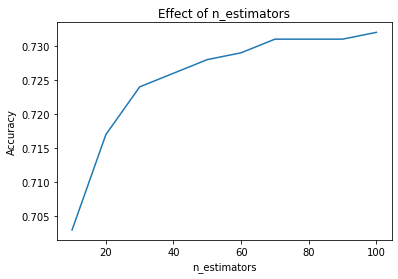

In [24]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### n_estimators = 30

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

rf = RandomForestClassifier(n_estimators = 30)

rf.fit(X_train_std, y_train)
pred_y_test = rf.predict(X_test_std)

In [26]:
rf.score(X_train_std, y_train)

0.9991028061293711

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73   1097969
         1.0       0.73      0.71      0.72   1113212

    accuracy                           0.72   2211181
   macro avg       0.72      0.72      0.72   2211181
weighted avg       0.72      0.72      0.72   2211181

Accuracy: 0.7241085193839853
Precision: 0.7346716240821444
Recall: 0.7075157292591169
F-1: 0.7208380085627628
AUC: 0.7242236974536181


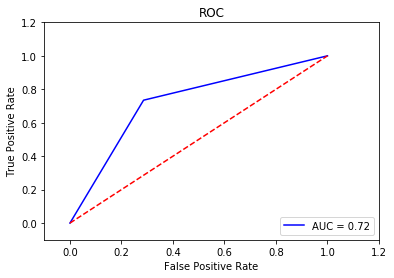

Confusion Matrix:
[[813520 284449]
 [325597 787615]]
True positives: 813520
False positives: 325597
True negatives: 787615
False negatives: 284449




In [27]:
evaluate_model(y_test, pred_y_test)

In [28]:
pred_result = rf.predict(all_test_std)

In [29]:
update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))

In [30]:
update.set_index("id" , inplace=True)
update.head()

,target
id,
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [31]:
update.shape

(2556790, 1)

In [32]:
update.to_csv('submission_rf調參1.csv') ## rf調參1

### n_estimators = 70

In [33]:
rf = RandomForestClassifier(n_estimators = 70)

rf.fit(X_train_std, y_train)
pred_y_test = rf.predict(X_test_std)

In [34]:
rf.score(X_train_std, y_train)

0.9999614297731141

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73   1097969
         1.0       0.74      0.73      0.73   1113212

    accuracy                           0.73   2211181
   macro avg       0.73      0.73      0.73   2211181
weighted avg       0.73      0.73      0.73   2211181

Accuracy: 0.7303237500684023
Precision: 0.7351268589436261
Recall: 0.7258824015551395
F-1: 0.7304753833463282
AUC: 0.7303545794795185


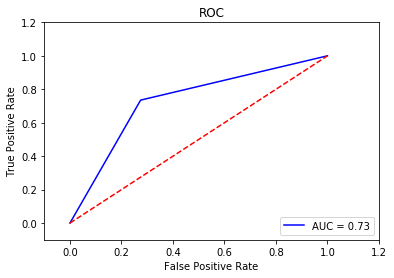

Confusion Matrix:
[[806817 291152]
 [305151 808061]]
True positives: 806817
False positives: 305151
True negatives: 808061
False negatives: 291152




In [35]:
evaluate_model(y_test, pred_y_test)

In [36]:
pred_result = rf.predict(all_test_std)

In [37]:
update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
print(update.shape)

(2556790, 1)


In [38]:
update.to_csv('submission_rf調參2.csv') ## rf調參2

## max_depth

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
random = np.arange(3,50,5)

f1score = []
acc = []

for n in random:
    model.set_params(n_estimators= 70, max_depth = n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

0.618
0.623
0.642
0.667
0.694
0.717
0.728
0.731
0.732
0.731


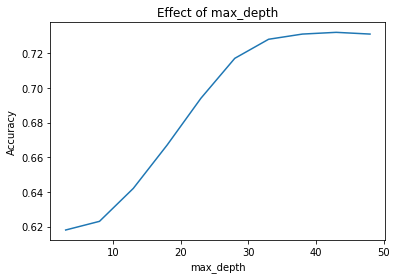

In [60]:
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### max_depth = 38

In [61]:
rf = RandomForestClassifier(n_estimators = 70,max_depth = 38)

rf.fit(X_train_std, y_train)
pred_y_test = rf.predict(X_test_std)

In [62]:
rf.score(X_train_std, y_train)

0.988610153854503

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73   1098273
         1.0       0.73      0.74      0.74   1112908

    accuracy                           0.73   2211181
   macro avg       0.73      0.73      0.73   2211181
weighted avg       0.73      0.73      0.73   2211181

Accuracy: 0.7306448454468449
Precision: 0.7273134725794871
Recall: 0.743639186707257
F-1: 0.7353857322539528
AUC: 0.7305582676176776


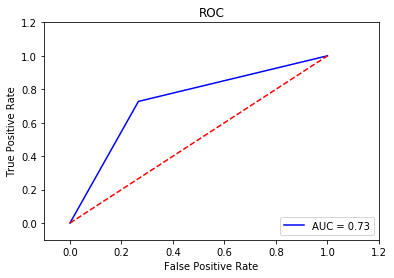

Confusion Matrix:
[[787986 310287]
 [285306 827602]]
True positives: 787986
False positives: 285306
True negatives: 827602
False negatives: 310287




In [63]:
evaluate_model(y_test, pred_y_test)

In [64]:
pred_result = rf.predict(all_test_std)

update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
print(update.shape)

(2556790, 1)


In [65]:
update.to_csv('submission_rf調參3.csv') ## rf調參3

### max_depth = 38, oob_score = True

In [37]:
rf = RandomForestClassifier(n_estimators = 70,max_depth = 38, oob_score = True)

rf.fit(X_train_std, y_train)
pred_y_test = rf.predict(X_test_std)
print(rf.score(X_train_std, y_train))

0.987952715615321


Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73   1098273
         1.0       0.73      0.74      0.74   1112908

    accuracy                           0.73   2211181
   macro avg       0.73      0.73      0.73   2211181
weighted avg       0.73      0.73      0.73   2211181

Accuracy: 0.7312191991519464
Precision: 0.7281618667401123
Recall: 0.7435592160358269
F-1: 0.7357799967901825
AUC: 0.7311369809115382


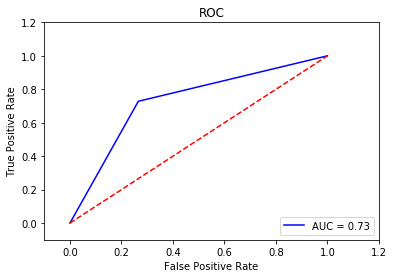

Confusion Matrix:
[[789345 308928]
 [285395 827513]]
True positives: 789345
False positives: 285395
True negatives: 827513
False negatives: 308928




In [67]:
evaluate_model(y_test, pred_y_test)

In [39]:
pred_result = rf.predict_proba(all_test_std)

pred_list = pred_result.tolist()
pred_ = []
for i in range(len(pred_list)):
    pred_.append(pred_list[i][-1])
print(len(pred_))


update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
update.head()
print(update.shape)

2556790
(2556790, 1)


In [40]:
update.to_csv('submission_rf調參4.csv') ## rf調參4

# XGBoost

## n_estimators

In [42]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

In [7]:
model = XGBClassifier()

random = np.arange(10,110,20)

f1score = []
acc = []

for n in random:
    model.set_params(n_estimators= n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

[14:06:06] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.621
[14:11:54] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.622
[14:27:04] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.627
[14:51:04] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.63
[15:25:04] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single 

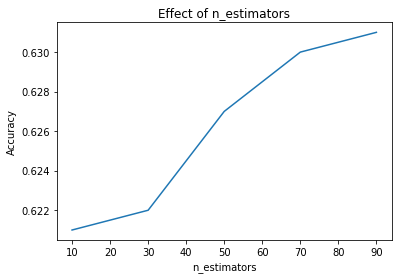

In [8]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### n_estimators = 90

In [78]:
xgb = XGBClassifier(n_estimators = 90)

xgb.fit(X_train_std, y_train)
pred_y_test = xgb.predict(X_test_std)

[01:48:47] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [79]:
xgb.score(X_train_std, y_train)

0.6310374034290676

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63   1098273
         1.0       0.63      0.63      0.63   1112908

    accuracy                           0.63   2211181
   macro avg       0.63      0.63      0.63   2211181
weighted avg       0.63      0.63      0.63   2211181

Accuracy: 0.630790514209375
Precision: 0.6345857249325753
Recall: 0.6281372763966114
F-1: 0.6313450352606698
AUC: 0.6308081920250864


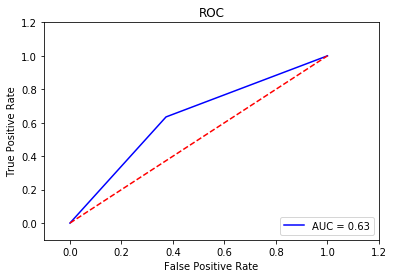

Confusion Matrix:
[[695733 402540]
 [413849 699059]]
True positives: 695733
False positives: 413849
True negatives: 699059
False negatives: 402540




In [80]:
evaluate_model(y_test, pred_y_test)

In [81]:
pred_result = xgb.predict(all_test_std)

update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" ,inplace=True)
print(update.shape)

(2556790, 1)


In [83]:
update.to_csv('submission_xgb調參1.csv') ## xgb調參1

## max_depth

In [82]:
model = XGBClassifier()

random = np.arange(3,50,5)

f1score = []
acc = []

for n in random:
    model.set_params(n_estimators= 90, max_depth = n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

[02:32:06] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.631
[03:11:54] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.655
[04:30:20] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.7
[06:34:47] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.733
[09:39:05] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single m

KeyboardInterrupt: 

In [ ]:
# plt.title("Effect of n_estimators")
# plt.xlabel("n_estimators")
# plt.ylabel("Accuracy")
# plt.plot(random, acc)

### max_depth = 18

In [43]:
xgb = XGBClassifier(n_estimators = 90, max_depth=18)

xgb.fit(X_train_std, y_train)
pred_y_test = xgb.predict(X_test_std)

[01:24:58] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [44]:
xgb.score(X_train_std, y_train)

0.8329027293765578

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73   1098273
         1.0       0.73      0.75      0.74   1112908

    accuracy                           0.73   2211181
   macro avg       0.73      0.73      0.73   2211181
weighted avg       0.73      0.73      0.73   2211181

Accuracy: 0.7328527153588964
Precision: 0.7293091440510578
Recall: 0.7461659005057022
F-1: 0.7376412311756537
AUC: 0.7327640131579758


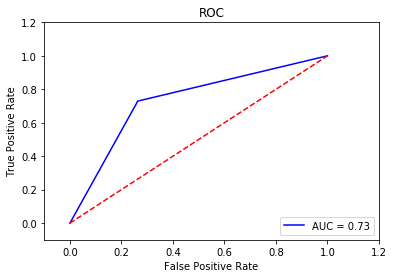

Confusion Matrix:
[[790056 308217]
 [282494 830414]]
True positives: 790056
False positives: 282494
True negatives: 830414
False negatives: 308217




In [86]:
evaluate_model(y_test, pred_y_test)

In [45]:
pred_result = xgb.predict_proba(all_test_std)

pred_list = pred_result.tolist()
pred_ = []
for i in range(len(pred_list)):
    pred_.append(pred_list[i][-1])
print(len(pred_))


update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
update.head()
print(update.shape)

2556790
(2556790, 1)


In [46]:
update.to_csv('submission_xgb調參2.csv') ## xgb調參2